## imbalanced data problem
- 클래스에 속하는 데이터의 갯수가 크게 차이가 나는 경우 문제 발생
- 정확도는 높을 수 있다. (accuracy)
- 그러나 데이터의 갯수가 적은 클래스의 재현율(recall-rate)이 급격하게 낮아지는 문제가 발생한다.

In [2]:
%matplotlib inline

In [3]:
from sklearn.datasets import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.svm import SVC

In [4]:
def classification_result(n0, n1, title="") : 
    
    rv1 = sp.stats.multivariate_normal([-1, 0], [[1, 0], [0, 1]])
    rv2 = sp.stats.multivariate_normal([+1, 0], [[1, 0], [0, 1]])
    X0 = rv1.rvs(n0, random_state=0)
    X1 = rv2.rvs(n1, random_state=0)
    X = np.vstack([X0, X1])
    y = np.hstack([np.zeros(n0), np.ones(n1)])
    
    x1min = -4 ; x1max = 4
    x2min = -2 ; x2max = 2
    xx1 = np.linspace(x1min, x1max, 1000)
    xx2 = np.linspace(x2min, x2max, 1000)
    X1, X2 = np.meshgrid(xx1, xx2)
    
    plt.contour(X1, X2, rv1.pdf(np.dstack([X1, X2])), levels=[0.05], 
                linestyles="dashed")
    plt.contour(X1, X2, rv2.pdf(np.dstack([X1, X2])), levels=[0.05], 
                linestyles="dashed")
    
    model = SVC(kernel="linear", C=1e4, random_state=0).fit(X, y)
    Y = np.reshape(model.predict(np.array([X1.ravel(), X2.ravel()]).T), X1.shape)
    
    plt.scatter(X[y == 0, 0], X[y == 0, 1], marker="x", label="class 0")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker="o", label="class 1")
    plt.contour(X1, X2, Y,colors="k", levels=[0.5])
    
    y_pred = model.predict(X)
    
    plt.xlim(-4, 4)
    plt.ylim(-3, 3)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    
    return model, X, y, y_pred

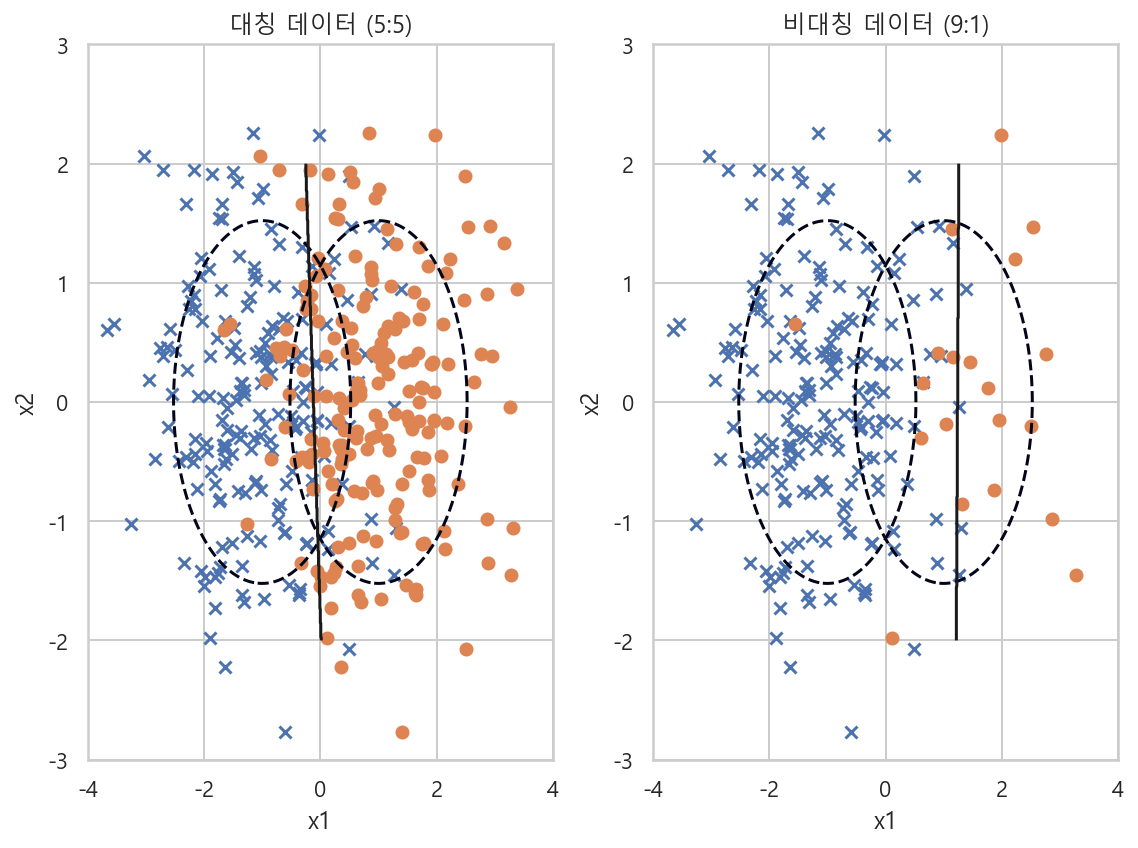

In [5]:
plt.figure(figsize=(8, 6))
plt.subplot(121)
model1, X1, y1, y_pred1 = classification_result(200, 200, "대칭 데이터 (5:5)")

plt.subplot(122)
model2, X2, y2, y_pred2 = classification_result(200, 20, "비대칭 데이터 (9:1)")

plt.tight_layout()
plt.show() ; 

In [6]:
test_data = sp.stats.multivariate_normal([-1, 0], [[1, 0], [0, 1]])
test_data_2 = sp.stats.multivariate_normal([+1, 0], [[1, 0], [0, 1]])
test_X0 = test_data.rvs(200, random_state=0)
test_X1 = test_data_2.rvs(200, random_state=0)

In [7]:
test_X0

array([[ 0.76405235,  0.40015721],
       [-0.02126202,  2.2408932 ],
       [ 0.86755799, -0.97727788],
       [-0.04991158, -0.15135721],
       [-1.10321885,  0.4105985 ],
       [-0.85595643,  1.45427351],
       [-0.23896227,  0.12167502],
       [-0.55613677,  0.33367433],
       [ 0.49407907, -0.20515826],
       [-0.6869323 , -0.85409574],
       [-3.55298982,  0.6536186 ],
       [-0.1355638 , -0.74216502],
       [ 1.26975462, -1.45436567],
       [-0.95424148, -0.18718385],
       [ 0.53277921,  1.46935877],
       [-0.84505257,  0.37816252],
       [-1.88778575, -1.98079647],
       [-1.34791215,  0.15634897],
       [ 0.23029068,  1.20237985],
       [-1.38732682, -0.30230275],
       [-2.04855297, -1.42001794],
       [-2.70627019,  1.9507754 ],
       [-1.50965218, -0.4380743 ],
       [-2.25279536,  0.77749036],
       [-2.61389785, -0.21274028],
       [-1.89546656,  0.3869025 ],
       [-1.51080514, -1.18063218],
       [-1.02818223,  0.42833187],
       [-0.93348278,

In [8]:
test_X1

array([[ 2.76405235e+00,  4.00157208e-01],
       [ 1.97873798e+00,  2.24089320e+00],
       [ 2.86755799e+00, -9.77277880e-01],
       [ 1.95008842e+00, -1.51357208e-01],
       [ 8.96781148e-01,  4.10598502e-01],
       [ 1.14404357e+00,  1.45427351e+00],
       [ 1.76103773e+00,  1.21675016e-01],
       [ 1.44386323e+00,  3.33674327e-01],
       [ 2.49407907e+00, -2.05158264e-01],
       [ 1.31306770e+00, -8.54095739e-01],
       [-1.55298982e+00,  6.53618595e-01],
       [ 1.86443620e+00, -7.42165020e-01],
       [ 3.26975462e+00, -1.45436567e+00],
       [ 1.04575852e+00, -1.87183850e-01],
       [ 2.53277921e+00,  1.46935877e+00],
       [ 1.15494743e+00,  3.78162520e-01],
       [ 1.12214252e-01, -1.98079647e+00],
       [ 6.52087851e-01,  1.56348969e-01],
       [ 2.23029068e+00,  1.20237985e+00],
       [ 6.12673183e-01, -3.02302751e-01],
       [-4.85529651e-02, -1.42001794e+00],
       [-7.06270191e-01,  1.95077540e+00],
       [ 4.90347818e-01, -4.38074302e-01],
       [-2.

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y1, y_pred1))
print(classification_report(y2, y_pred2))

              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84       200
         1.0       0.84      0.86      0.85       200

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       200
         1.0       0.75      0.60      0.67        20

    accuracy                           0.95       220
   macro avg       0.86      0.79      0.82       220
weighted avg       0.94      0.95      0.94       220



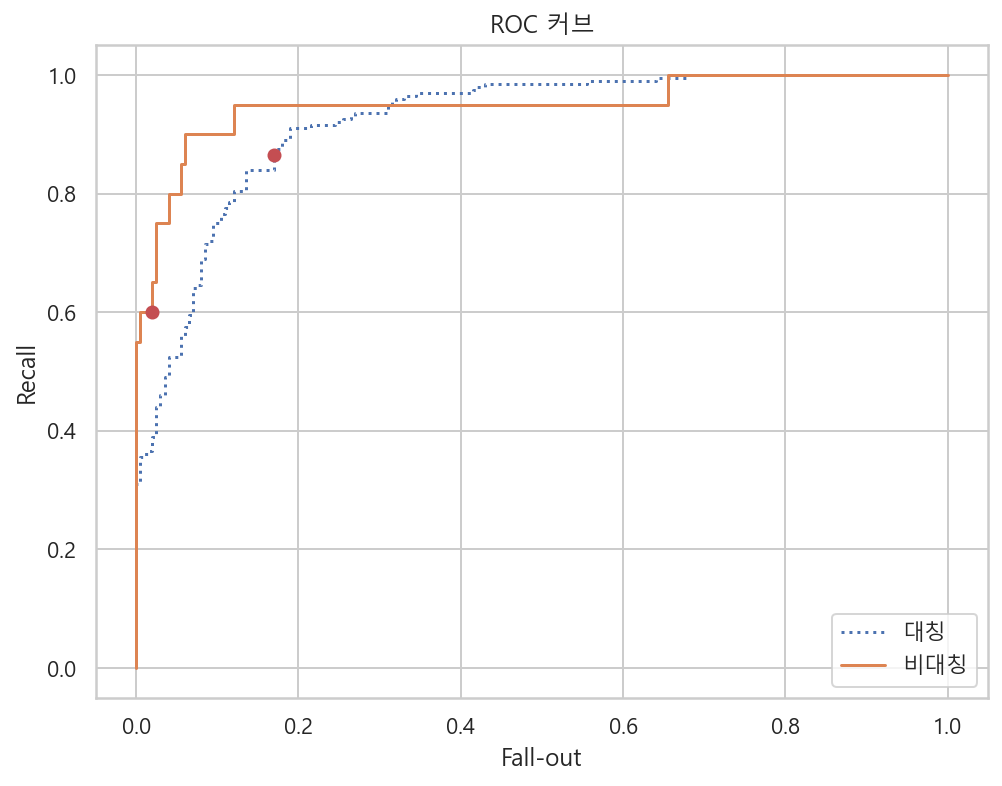

In [10]:
from sklearn.metrics import roc_curve, confusion_matrix

fpr1, tpr1, thresholds1 = roc_curve(y1, model1.decision_function(X1))
fpr2, tpr2, thresholds2 = roc_curve(y2, model2.decision_function(X2))

c1 = confusion_matrix(y1, y_pred1, labels=[1, 0])
c2 = confusion_matrix(y2, y_pred2, labels=[1, 0])
r1 = c1[0, 0] / (c1[0, 0] + c1[0, 1])
r2 = c2[0, 0] / (c2[0, 0] + c2[0, 1])
f1 = c1[1, 0] / (c1[1, 0] + c1[1, 1])
f2 = c2[1, 0] / (c2[1, 0] + c2[1, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, ":", label="대칭")
plt.plot(fpr2, tpr2, "-", label="비대칭")
plt.plot([f1], [r1], "ro")
plt.plot([f2], [r2], "ro")
plt.xlabel("Fall-out")
plt.ylabel("Recall")
plt.title("ROC 커브")
plt.legend()
plt.show() ; 

In [11]:
f1, r1

(0.17, 0.865)

In [12]:
f2, r2

(0.02, 0.6)

In [13]:
X1.shape, y1.shape

((400, 2), (400,))

In [14]:
X2.shape, y2.shape

((220, 2), (220,))

## imbalanced learn 패키지

In [1]:
!pip install -U imbalanced-learn


[notice] A new release of pip is available: 23.1.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 235.6/235.6 kB 4.8 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.6.2
    Uninstalling imbalanced-learn-0.6.2:
      Successfully uninstalled imbalanced-learn-0.6.2


In [1]:
from imblearn.under_sampling import *

In [2]:
n0 = 200 ; n1 = 20

rv1 = sp.stats.multivariate_normal([-1, 0], [[1, 0], [0, 1]])
rv2 = sp.stats.multivariate_normal([+1, 0], [[1, 0], [0, 1]])
X0 = rv1.rvs(n0, random_state=0)
X1 = rv2.rvs(n1, random_state=0)
X_imb = np.vstack([X0, X1])
y_imb = np.hstack([np.zeros(n0), np.ones(n1)])

x1min = -4 ; x1max = 4
x2min = -2 ; x2max = 2
xx1 = np.linspace(x1min, x1max, 1000)
xx2 = np.linspace(x2min, x2max, 1000)
X1, X2 = np.meshgrid(xx1, xx2)

In [33]:
from sklearn.svm import SVC

In [34]:
def classification_result2(X, y, title="") : 
    
    plt.contour(X1, X2, rv1.pdf(np.dstack([X1, X2])), levels=[0.05], 
                linestyles="dashed")
    plt.contour(X1, X2, rv2.pdf(np.dstack([X1, X2])), levels=[0.05], 
                linestyles="dashed")
    model = SVC(kernel="linear", C=1e4, random_state=0).fit(X, y)
    Y = np.reshape(model.predict(np.array([X1.ravel(), X2.ravel()]).T), X1.shape)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], marker="x", label="class 0")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker="o", label="class 1")
    plt.contour(X1, X2, Y, colors="k", levels=[0.5])
    y_pred = model.predict(X)
    plt.xlim(-4, 4)
    plt.ylim(-3, 3)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    plt.legend()
    
    return model

In [17]:
%matplotlib inline

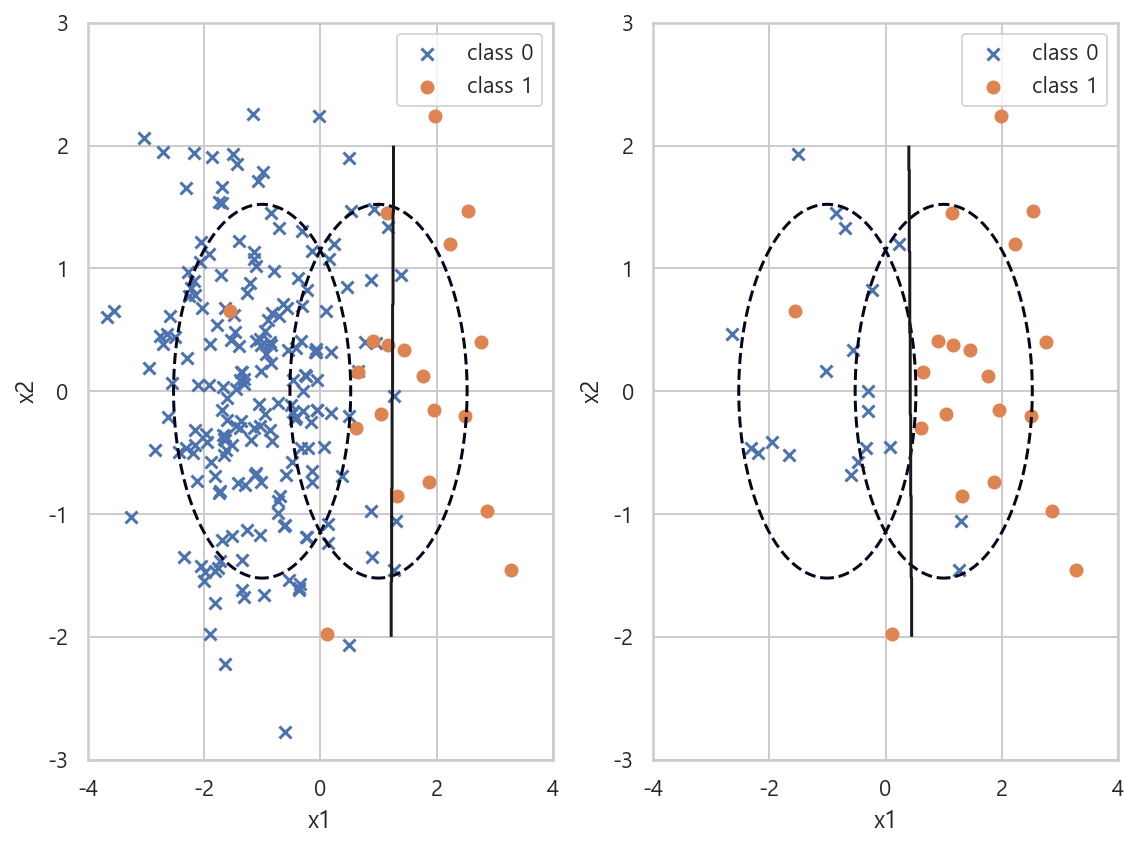

In [18]:
X_samp, y_samp = RandomUnderSampler(random_state=0).fit_resample(X_imb, y_imb)

plt.figure(figsize=(8, 6))
plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)
plt.tight_layout()
plt.show()

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_imb, model_samp.predict(X_imb)))

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95       200
         1.0       0.51      0.90      0.65        20

    accuracy                           0.91       220
   macro avg       0.75      0.91      0.80       220
weighted avg       0.95      0.91      0.92       220



### tomek's link method

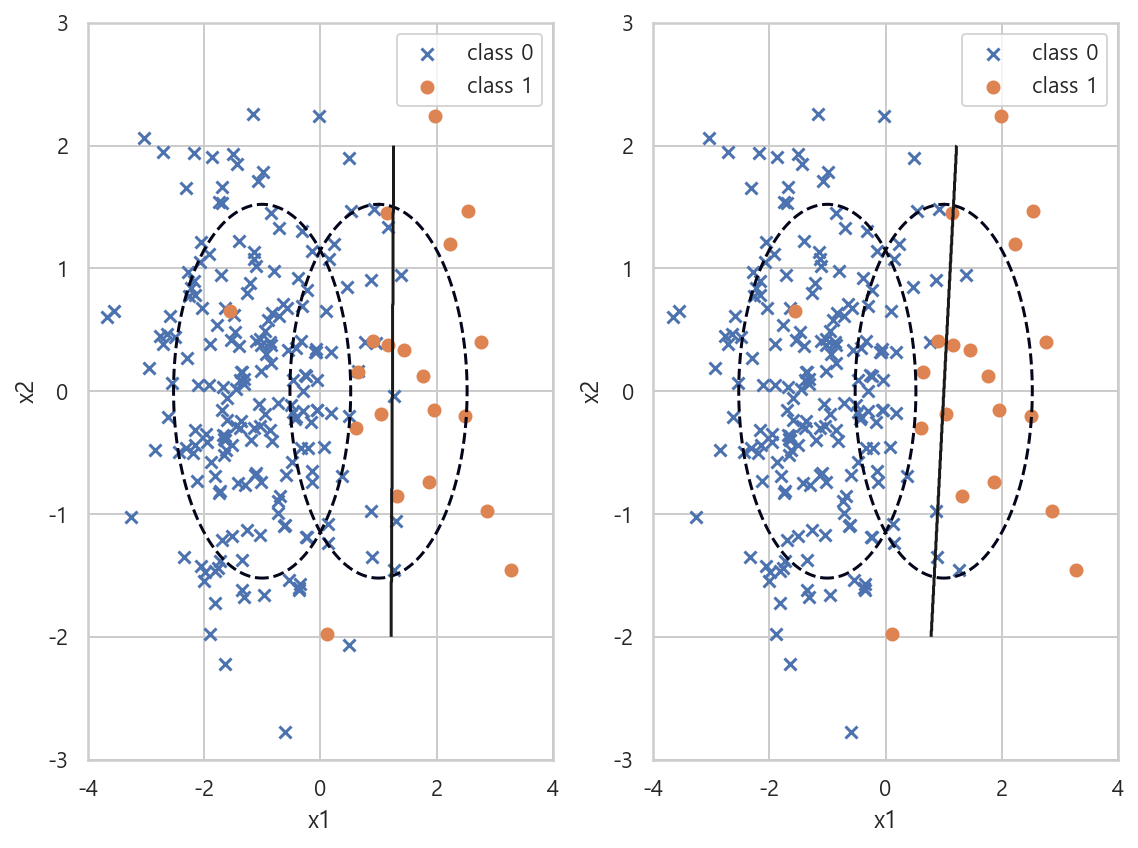

In [25]:
X_samp, y_samp = TomekLinks().fit_resample(X_imb, y_imb)

plt.figure(figsize=(8, 6))
plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)
plt.tight_layout()
plt.show() ; 

In [26]:
print(classification_report(y_imb, model_samp.predict(X_imb)))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       200
         1.0       0.70      0.70      0.70        20

    accuracy                           0.95       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.95      0.95      0.95       220



### Condensed Nearest Neighbour

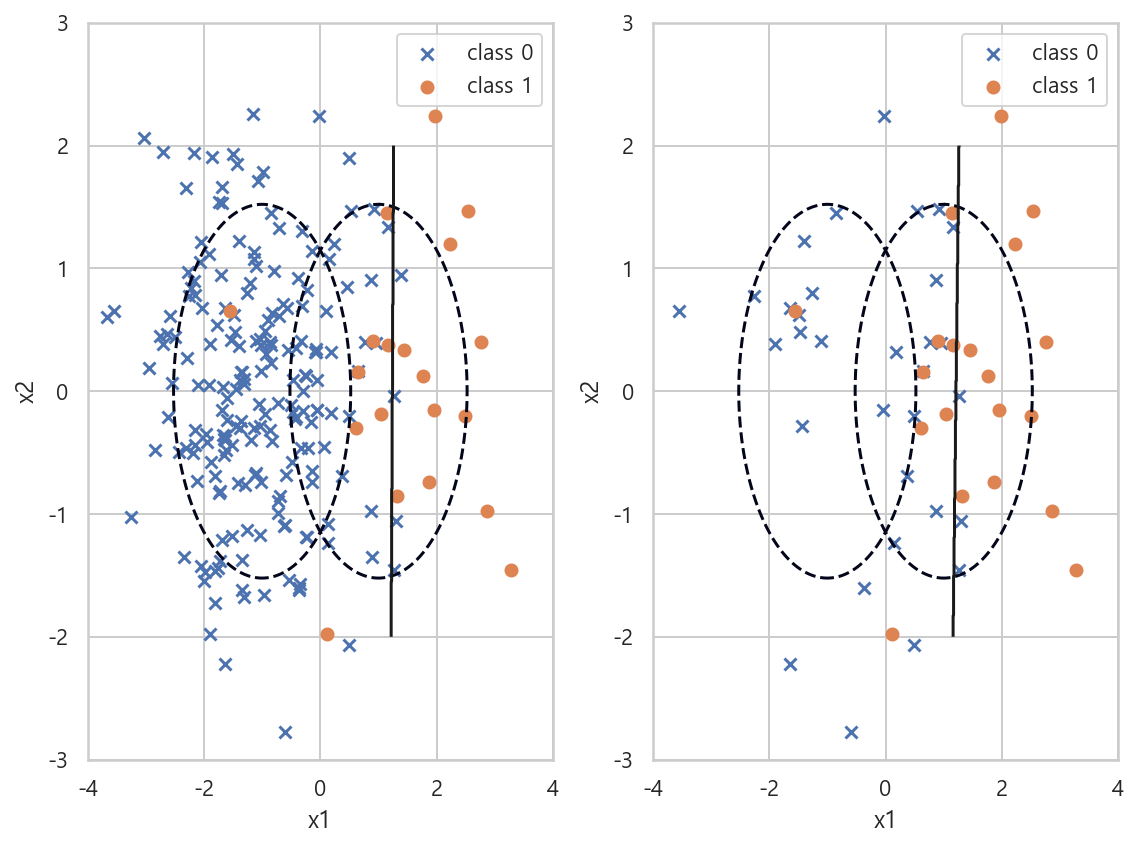

In [35]:
X_samp, y_samp = CondensedNearestNeighbour(random_state=0).fit_resample(X_imb, y_imb)

plt.figure(figsize=(8, 6))
plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)
plt.tight_layout()
plt.show() ; 

In [37]:
print(classification_report(y_imb, model_samp.predict(X_imb)))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       200
         1.0       0.75      0.60      0.67        20

    accuracy                           0.95       220
   macro avg       0.86      0.79      0.82       220
weighted avg       0.94      0.95      0.94       220



### One sided selection
- tomack + condensed nearest neighbour

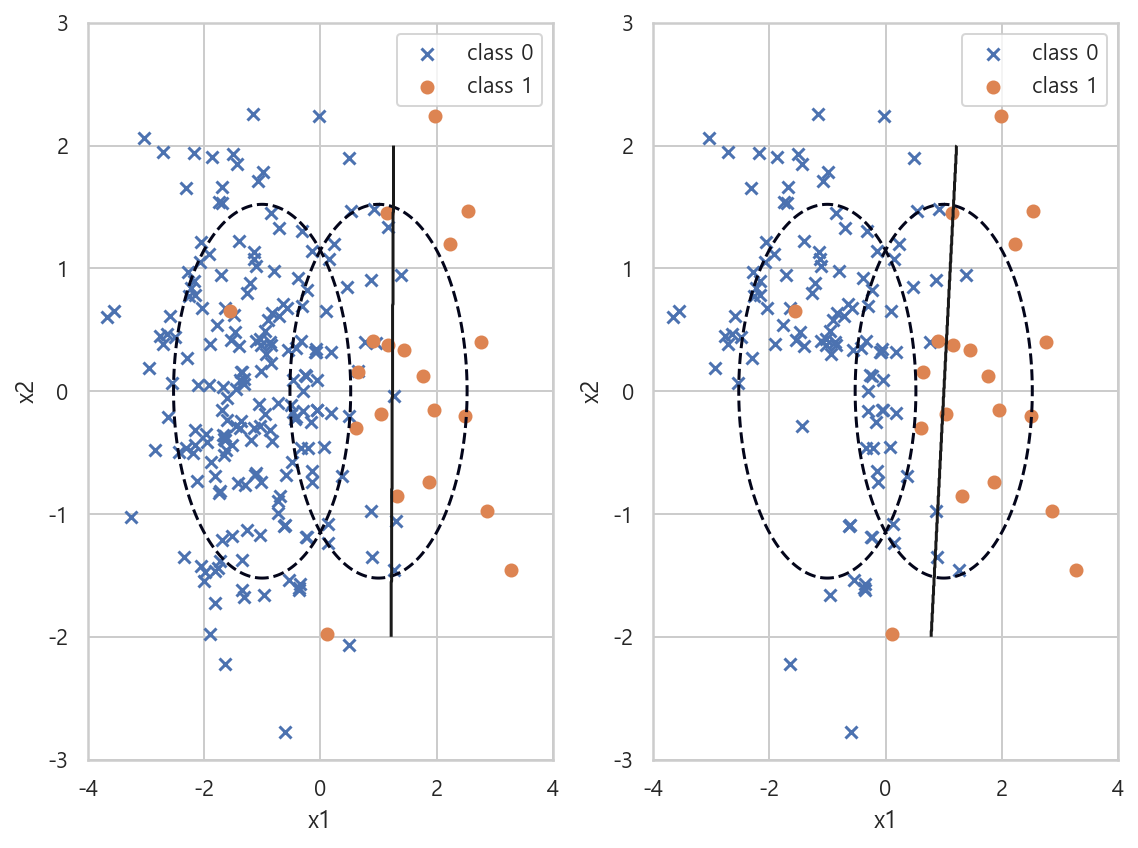

In [43]:
X_samp, y_samp = OneSidedSelection(random_state=0).fit_resample(X_imb, y_imb)

plt.figure(figsize=(8, 6))
plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)
plt.tight_layout()
plt.show() ; 

In [2]:
%matplotlib inline
from sklearn.datasets import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.svm import SVC

In [14]:
def classification_result(n0, n1, title="") : 
    
    rv1 = sp.stats.multivariate_normal([-1, 0], [[1, 0], [0, 1]])
    rv2 = sp.stats.multivariate_normal([+1, 0], [[1, 0], [0, 1]])
    X0 = rv1.rvs(n0, random_state=0)
    X1 = rv2.rvs(n1, random_state=0)
    X = np.vstack([X0, X1])
    y = np.hstack([np.zeros(n0), np.ones(n1)])
    
    x1min = -4 ; x1max = 4
    x2min = -2 ; x2max = 2
    xx1 = np.linspace(x1min, x1max, 1000)
    xx2 = np.linspace(x2min, x2max, 1000)
    X1, X2 = np.meshgrid(xx1, xx2)
    
    plt.contour(X1, X2, rv1.pdf(np.dstack([X1, X2])), levels=[0.05], 
                linestyle="dashed")
    plt.contour(X1, X2, rv2.pdf(np.dstack([X1, X2])), levels=[0.05], 
                linestyle="dashed")
    
    model = SVC(kernel="linear", C=1e4, random_state=0).fit(X, y)
    Y = np.reshape(model.predict(np.array([X1.ravel(), X2.ravel()]).T), X1.shape)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], marker="x", label="class 0")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker="o", label="class 1")
    plt.contour(X1, X2, Y, colors="k", levels=[0.5])
    y_pred = model.predict(X)
    plt.xlim(-4, 4)
    plt.ylim(-3, 3)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    
    return model, X, y, y_pred

In [5]:
test_x1 = [[1, 2, 3, 4]]
test_x2 = [[5, 6, 7, 7]]
test_vstack = np.vstack([test_x1, test_x2])
test_vstack

array([[1, 2, 3, 4],
       [5, 6, 7, 7]])

In [6]:
test_hstack = np.hstack([test_x1, test_x2])
test_hstack

array([[1, 2, 3, 4, 5, 6, 7, 7]])

In [7]:
test_hstack.shape

(1, 8)

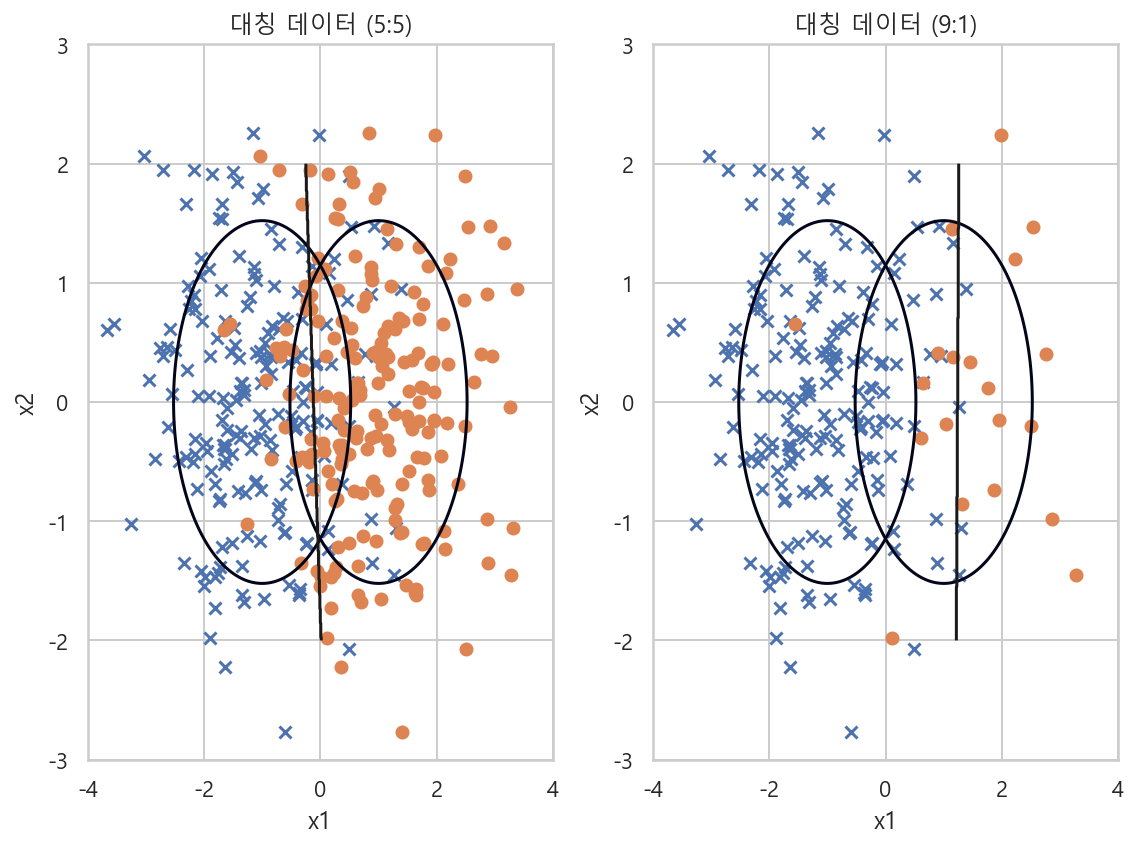

In [15]:
plt.figure(figsize=(8, 6))
plt.subplot(121)
model1, X1, y1, y_pred1 = classification_result(200, 200, "대칭 데이터 (5:5)")
plt.subplot(122)
model2, X2, y2, y_pred2 = classification_result(200, 20, "대칭 데이터 (9:1)")
plt.tight_layout()
plt.show() ; 

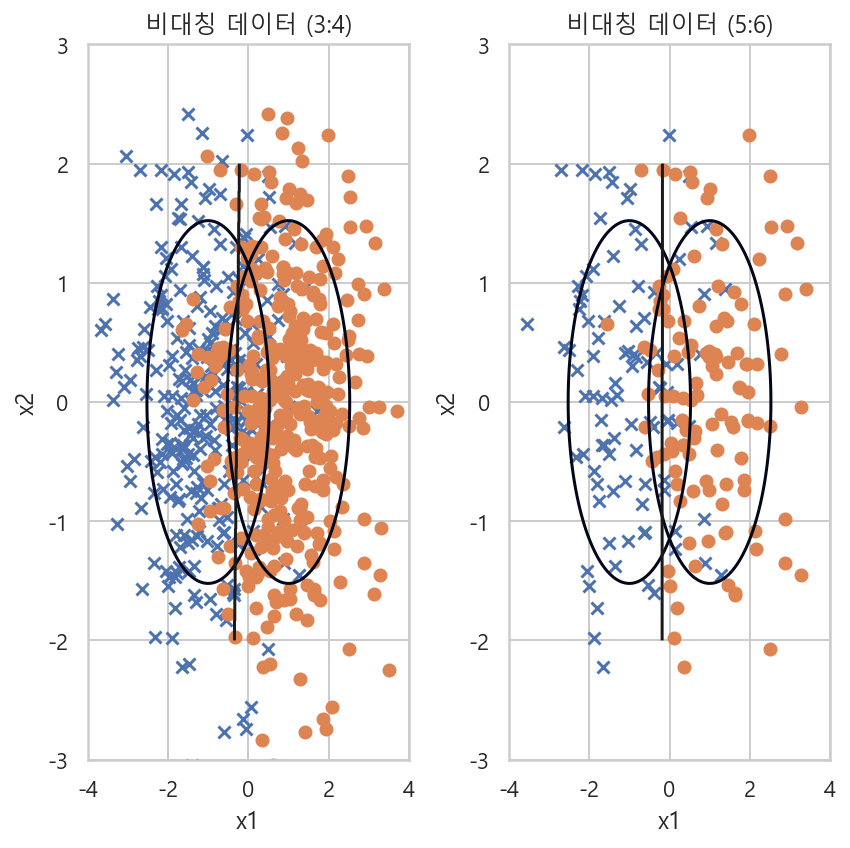

In [16]:
plt.figure(figsize=(6, 6))
plt.subplot(121)
model3, X3, y3, y_pred3 = classification_result(300, 400, "비대칭 데이터 (3:4)")
plt.subplot(122)
model4, X4, y4, y_pred4 = classification_result(100, 120, "비대칭 데이터 (5:6)")
plt.tight_layout()
plt.show() ; 

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y1, y_pred1))
print(classification_report(y2, y_pred2))
print(classification_report(y3, y_pred3))
print(classification_report(y4, y_pred4))

              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84       200
         1.0       0.84      0.86      0.85       200

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       200
         1.0       0.75      0.60      0.67        20

    accuracy                           0.95       220
   macro avg       0.86      0.79      0.82       220
weighted avg       0.94      0.95      0.94       220

              precision    recall  f1-score   support

         0.0       0.84      0.77      0.80       300
         1.0       0.84      0.89      0.86       400

    accuracy                           0.84       700
   macro avg       0.84      0.83      0.83       700
weighted avg       0.84      0.84      0.84       700

              preci

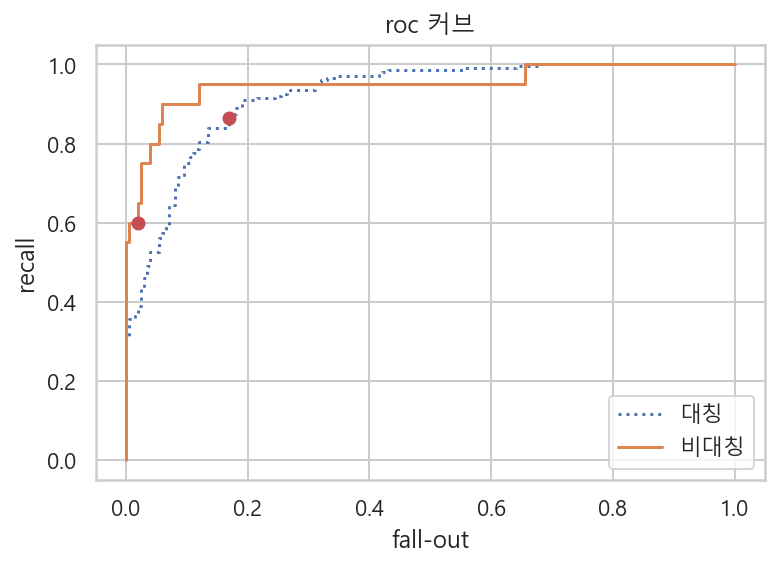

In [21]:
from sklearn.metrics import roc_curve, confusion_matrix

fpr1, tpr1, thresholds = roc_curve(y1, model1.decision_function(X1))
fpr2, tpr2, thresholds = roc_curve(y2, model2.decision_function(X2))

c1 = confusion_matrix(y1, y_pred1, labels=[1, 0])
c2 = confusion_matrix(y2, y_pred2, labels=[1, 0])
r1 = c1[0, 0] / (c1[0, 0] + c1[0, 1])
r2 = c2[0, 0] / (c2[0, 0] + c2[0, 1])
f1 = c1[1, 0] / (c1[1, 0] + c1[1, 1])
f2 = c2[1, 0] / (c2[1, 0] + c2[1, 1])

plt.plot(fpr1, tpr1, ":", label="대칭")
plt.plot(fpr2, tpr2, "-", label="비대칭")
plt.plot([f1], [r1], "ro")
plt.plot([f2], [r2], "ro")
plt.xlabel("fall-out")
plt.ylabel("recall")
plt.title("roc 커브")
plt.legend()
plt.show() ; 

In [22]:
from imblearn.under_sampling import *

In [28]:
n0 = 200 ; n1 = 20
rv1 = sp.stats.multivariate_normal([-1, 0], [[1, 0], [0, 1]])
rv2 = sp.stats.multivariate_normal([+1, 0], [[1, 0], [0, 1]])
X0 = rv1.rvs(n0, random_state=0)
X1 = rv2.rvs(n1, random_state=0)
X_imb = np.vstack([X0, X1])
y_imb = np.hstack([np.zeros(n0), np.ones(n1)])

x1min = -4 ; x1max = 4
x2min = -2 ; x2max = 2
xx1 = np.linspace(x1min, x1max, 1000)
xx2 = np.linspace(x2min, x2max, 1000)
X1, X2 = np.meshgrid(xx1, xx2)

def classification_result2(X, y, title="") : 
    
    plt.contour(X1, X2, rv1.pdf(np.dstack([X1, X2])), levels=[0.05], 
                linestyles="dashed")
    plt.contour(X1, X2, rv2.pdf(np.dstack([X1, X2])), levels=[0.05], 
                linestyles="dashed")
    model = SVC(kernel="linear", C=1e4, random_state=0).fit(X, y)
    Y = np.reshape(model.predict(np.array([X1.ravel(), X2.ravel()]).T), X1.shape)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], marker="x", label="class 0")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker="o", label="class 1")
    plt.contour(X1, X2, Y, colors="k", levels=[0.5])
    y_pred = model.predict(X)
    plt.xlim(-4, 4)
    plt.ylim(-3, 3)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    
    return model

### random under sampler

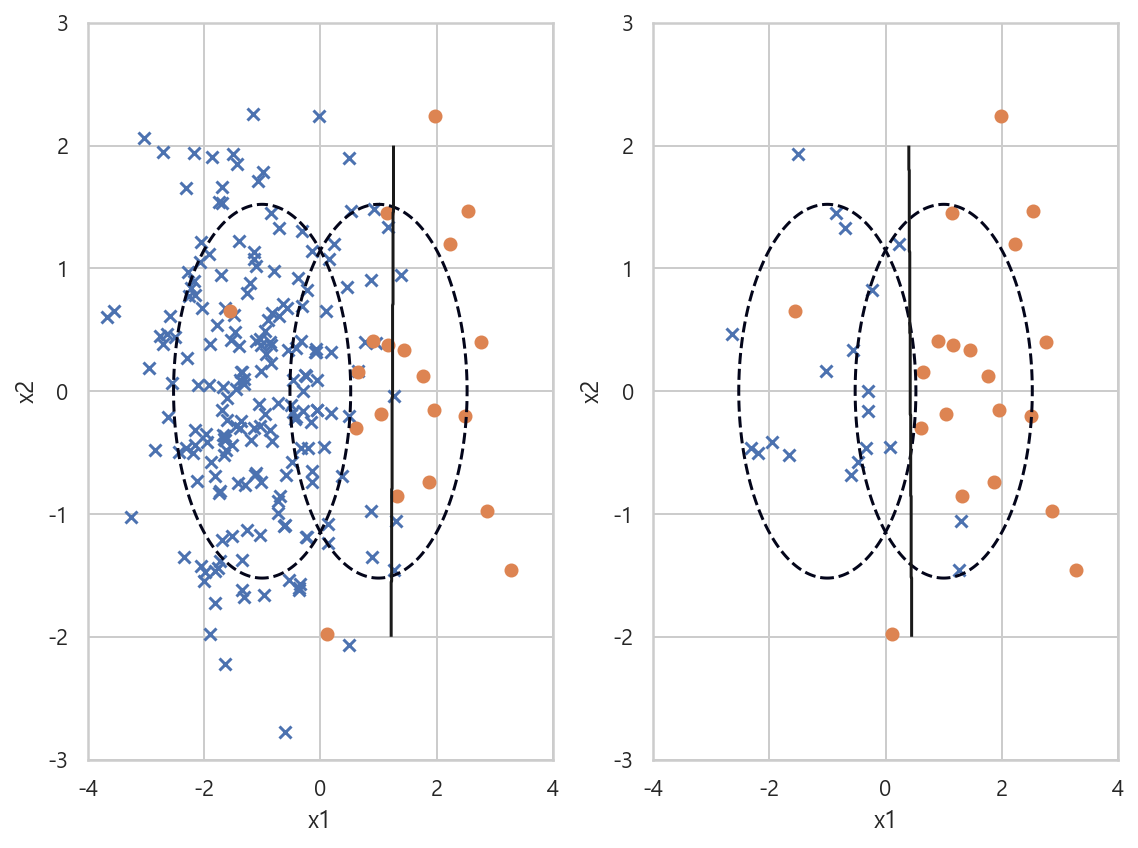

In [39]:
X_samp, y_samp = RandomUnderSampler(random_state=0).fit_resample(X_imb, y_imb)

plt.figure(figsize=(8, 6))
plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)
plt.tight_layout()
plt.show() ; 

In [32]:
print(classification_report(y_imb, model_samp.predict(X_imb)))

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95       200
         1.0       0.51      0.90      0.65        20

    accuracy                           0.91       220
   macro avg       0.75      0.91      0.80       220
weighted avg       0.95      0.91      0.92       220



In [40]:
print(classification_report(y_samp, model_samp.predict(X_samp)))

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90        20
         1.0       0.90      0.90      0.90        20

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40



### tomack's link method

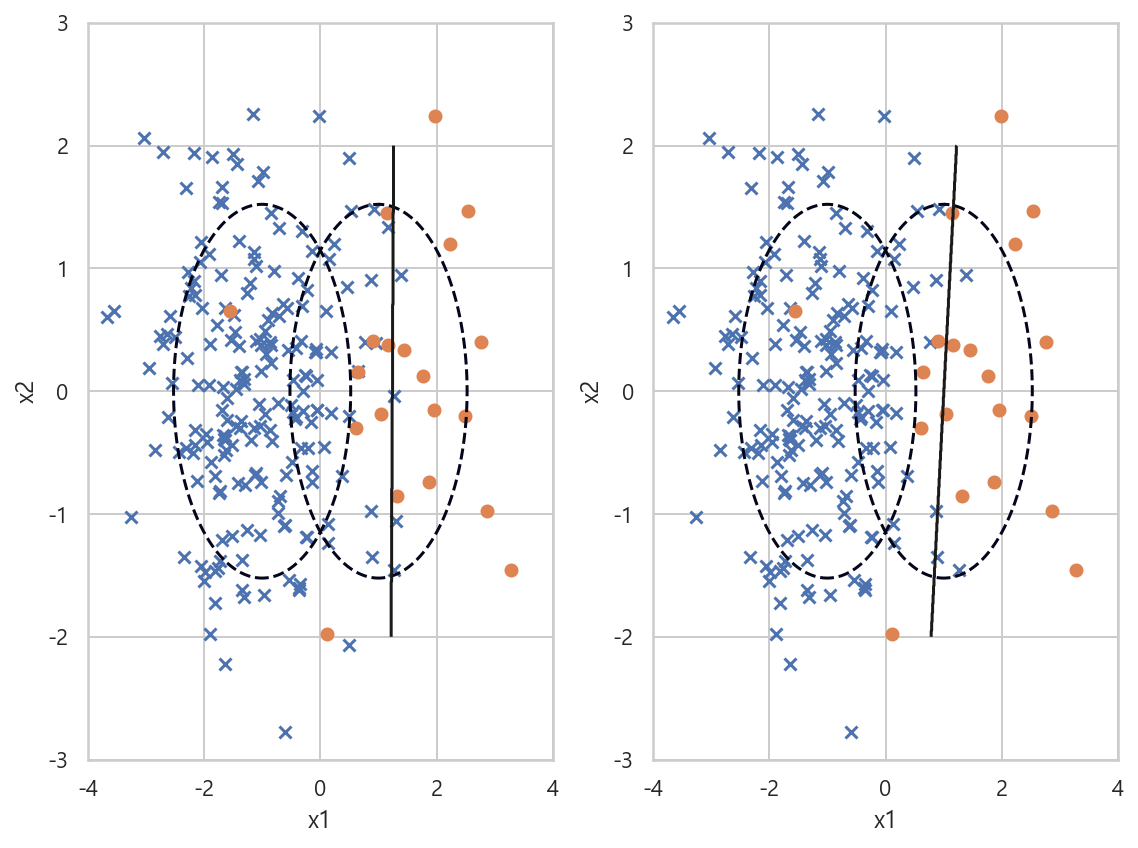

In [41]:
X_samp, y_samp = TomekLinks().fit_resample(X_imb, y_imb)

plt.figure(figsize=(8, 6))
plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)
plt.tight_layout()
plt.show() ; 

In [42]:
print(classification_report(y_imb, model_samp.predict(X_imb)))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       200
         1.0       0.70      0.70      0.70        20

    accuracy                           0.95       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.95      0.95      0.95       220



In [43]:
print(classification_report(y_samp, model_samp.predict(X_samp)))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       192
         1.0       0.82      0.70      0.76        20

    accuracy                           0.96       212
   macro avg       0.90      0.84      0.87       212
weighted avg       0.96      0.96      0.96       212



## condenced nearest neighbour

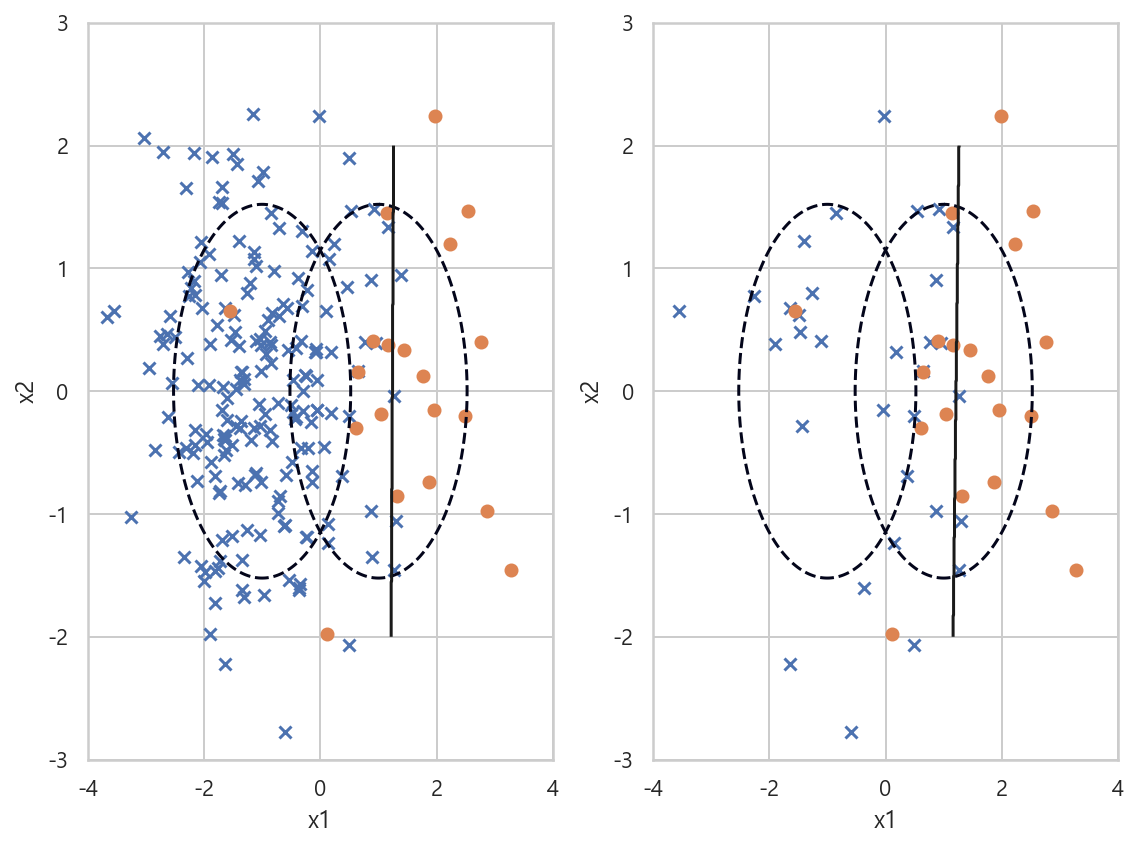

In [45]:
X_samp, y_samp = CondensedNearestNeighbour(random_state=0).fit_resample(X_imb, y_imb)

plt.figure(figsize=(8, 6))
plt.subplot(121)
model = classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)
plt.tight_layout()
plt.show() ; 

In [46]:
print(classification_report(y_imb, model.predict(X_imb)))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       200
         1.0       0.75      0.60      0.67        20

    accuracy                           0.95       220
   macro avg       0.86      0.79      0.82       220
weighted avg       0.94      0.95      0.94       220



In [47]:
print(classification_report(y_samp, model_samp.predict(X_samp)))

              precision    recall  f1-score   support

         0.0       0.78      0.91      0.84        32
         1.0       0.80      0.60      0.69        20

    accuracy                           0.79        52
   macro avg       0.79      0.75      0.76        52
weighted avg       0.79      0.79      0.78        52



### one side selection

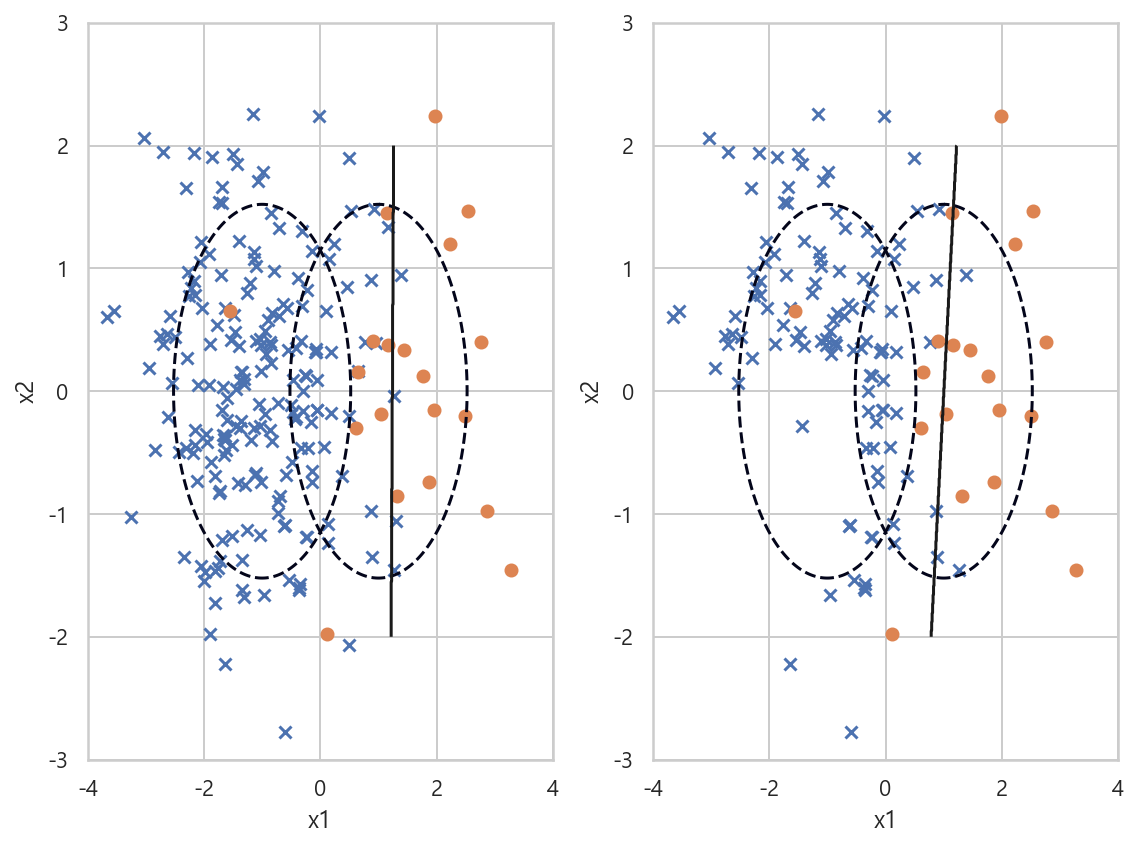

In [49]:
X_samp, y_samp = OneSidedSelection(random_state=0).fit_resample(X_imb, y_imb)

plt.figure(figsize=(8, 6))
plt.subplot(121)
model = classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)
plt.tight_layout()
plt.show() ; 

In [50]:
print(classification_report(y_imb, model.predict(X_imb)))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       200
         1.0       0.75      0.60      0.67        20

    accuracy                           0.95       220
   macro avg       0.86      0.79      0.82       220
weighted avg       0.94      0.95      0.94       220



In [51]:
print(classification_report(y_samp, model_samp.predict(X_samp)))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       115
         1.0       0.82      0.70      0.76        20

    accuracy                           0.93       135
   macro avg       0.89      0.84      0.86       135
weighted avg       0.93      0.93      0.93       135



### edited nearest neighbours

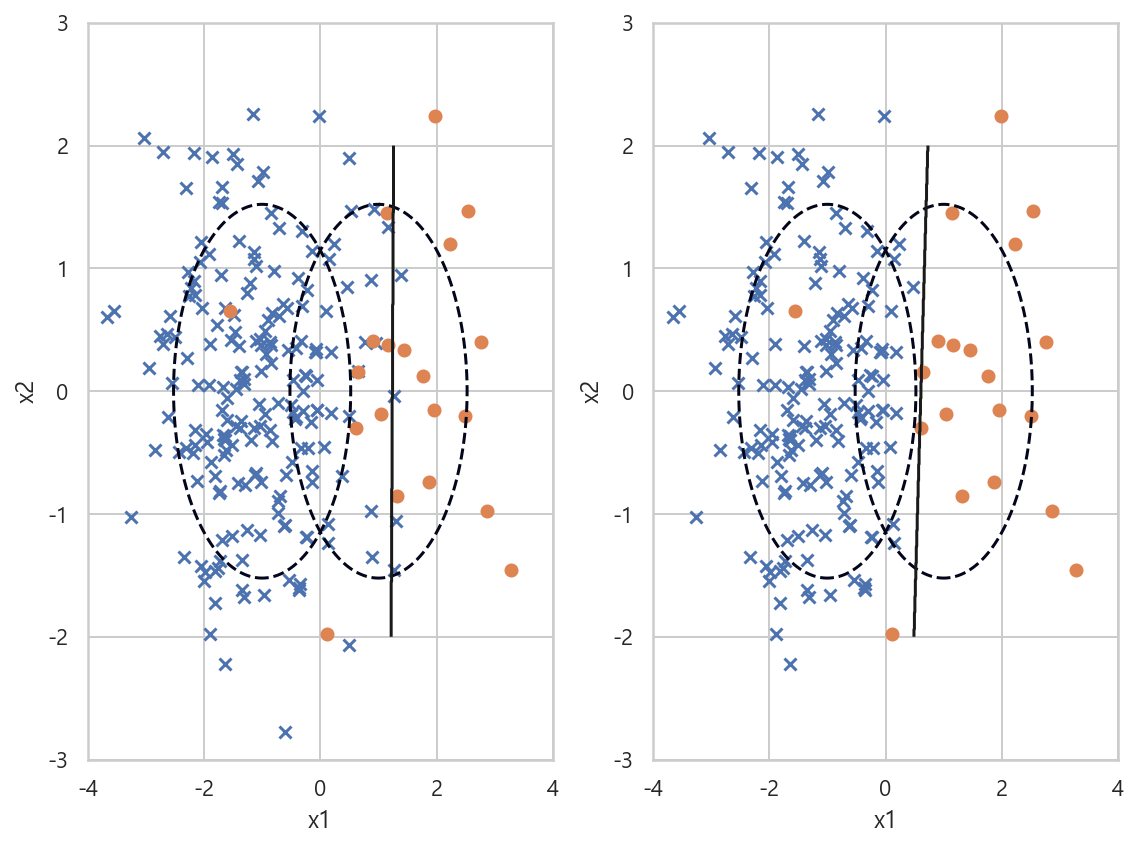

In [53]:
X_samp, y_samp = EditedNearestNeighbours(kind_sel="all", n_neighbors=5)\
.fit_resample(X_imb, y_imb)

plt.figure(figsize=(8, 6))
plt.subplot(121)
model = classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)
plt.tight_layout()
plt.show() ;  

In [54]:
print(classification_report(y_imb, model.predict(X_imb)))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       200
         1.0       0.75      0.60      0.67        20

    accuracy                           0.95       220
   macro avg       0.86      0.79      0.82       220
weighted avg       0.94      0.95      0.94       220



In [56]:
print(classification_report(y_samp, model_samp.predict(X_samp)))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       175
         1.0       1.00      0.90      0.95        20

    accuracy                           0.99       195
   macro avg       0.99      0.95      0.97       195
weighted avg       0.99      0.99      0.99       195



### neighbourhood cleaning rule

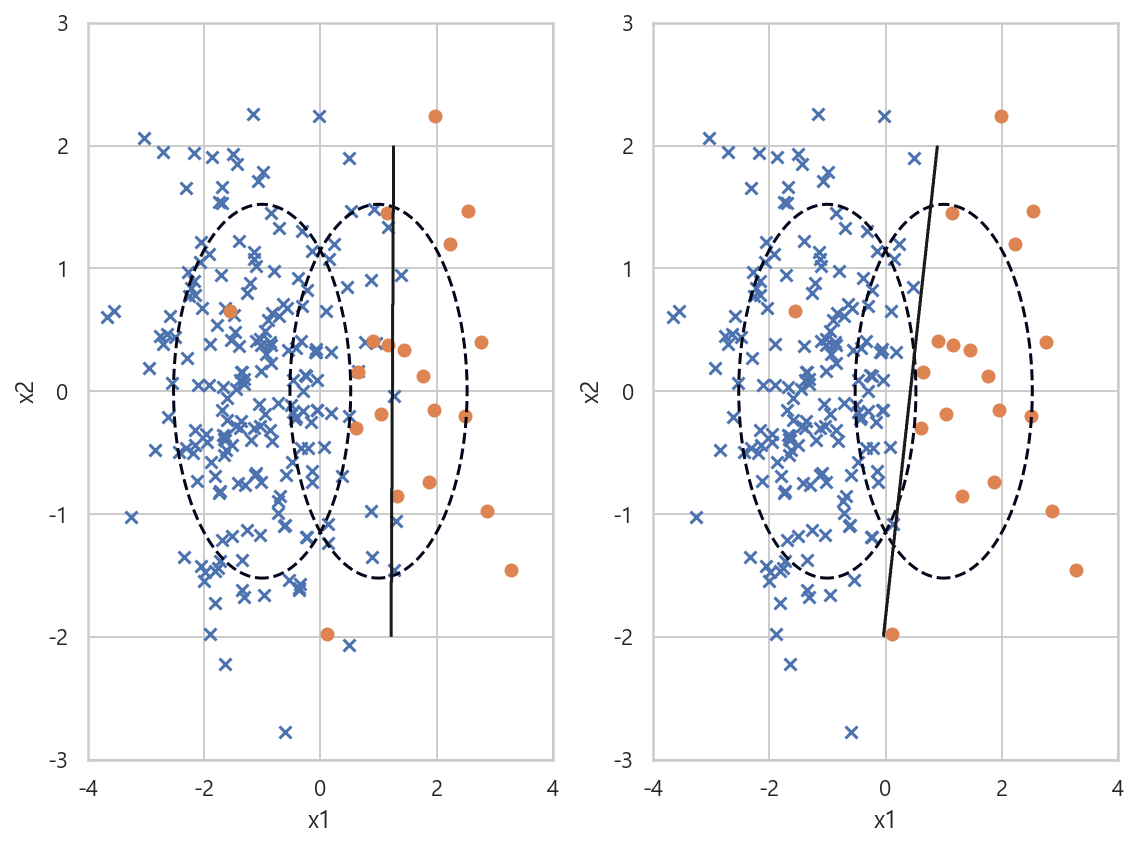

In [57]:
X_samp, y_samp = NeighbourhoodCleaningRule(kind_sel="all", n_neighbors=5)\
.fit_resample(X_imb, y_imb)

plt.figure(figsize=(8, 6))
plt.subplot(121)
model = classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)
plt.tight_layout()
plt.show() ; 

In [59]:
print(classification_report(y_imb, model.predict(X_imb)))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       200
         1.0       0.75      0.60      0.67        20

    accuracy                           0.95       220
   macro avg       0.86      0.79      0.82       220
weighted avg       0.94      0.95      0.94       220



In [60]:
print(classification_report(y_samp, model.predict(X_samp)))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       174
         1.0       1.00      0.60      0.75        20

    accuracy                           0.96       194
   macro avg       0.98      0.80      0.86       194
weighted avg       0.96      0.96      0.95       194

